# Assignment 2
# Carlo Montano Campillo
# EECS3401
# York University

# Task 1:
 Import the adult dataset from the ucimlrepo

In [2]:
#Carlo Montano Campillo
#Student ID: 217223694
#EECS3401
#York University

#Task 1

from ucimlrepo import fetch_ucirepo 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
#X stores the features
X = adult.data.features
#y stores the targets
y = adult.data.targets 

# Task 2

Take a quick look at the data structure (i.e., X) using .head(), .info(), .describe(), and .shape

In [4]:
#Task 2
print(X.head())
print(X.info())
print(X.describe())
print(X.shape)

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

# Task 2.1
Plot a histogram of the data

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

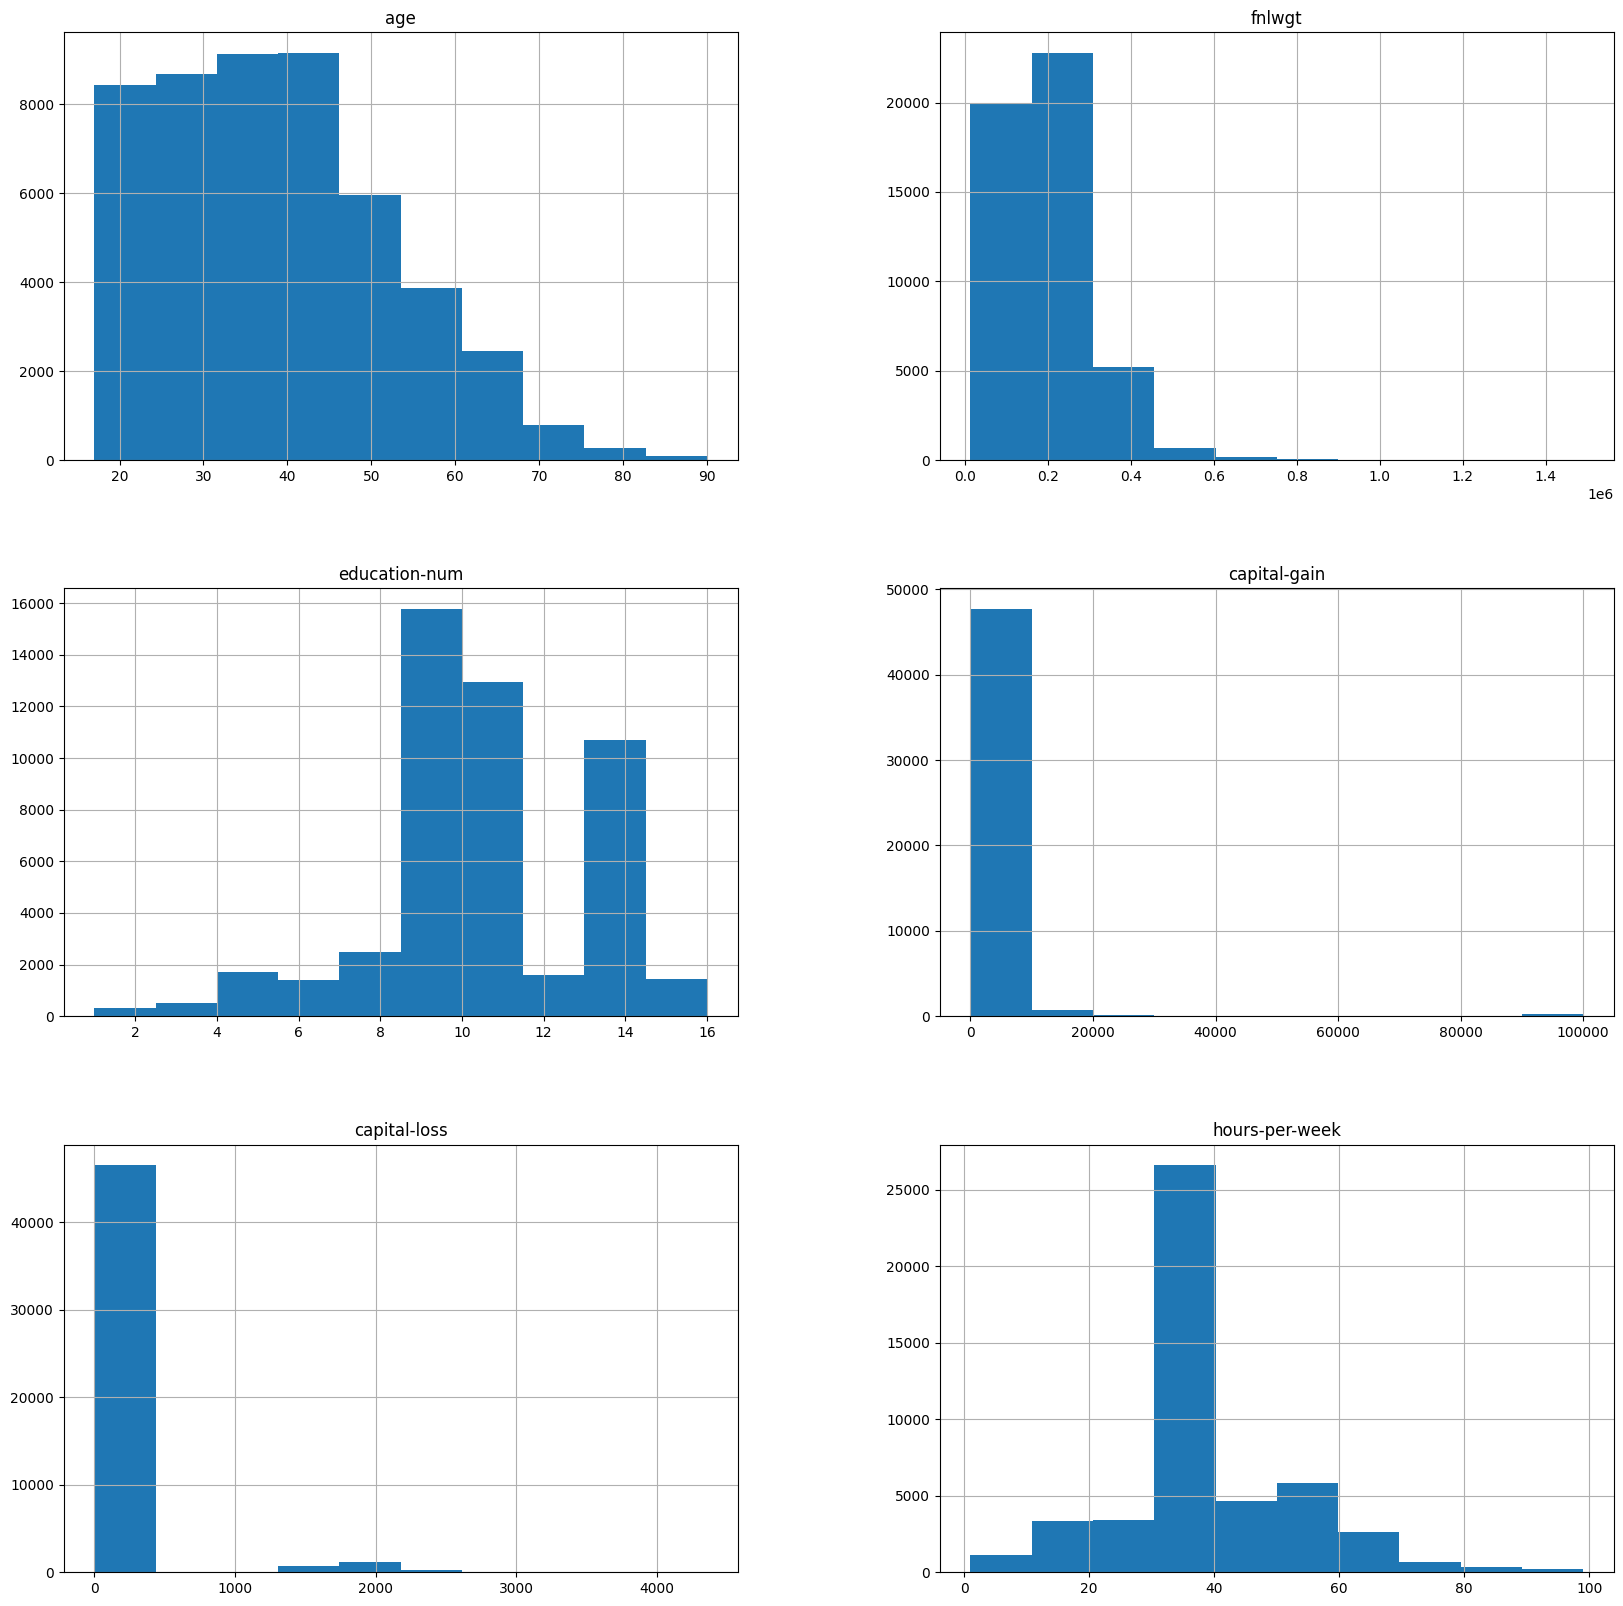

In [5]:
#Task 2.1
#Plots histograms of size (20,20)
X.hist(figsize=(20, 20))

# Task 3
Check for the number of missing values

In [3]:
#Task 3
#Return number of missing values in each column
(X=='?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

# Task 4
Replace the missing values with NAN

In [4]:
#Task 4
#Replaces the missing values '?' with NAN
X = X.replace('?', np.nan)
#Shows count of not Null values in each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


# Task 5
Create and apply a preprocessing pipeline

In [5]:
#Task 5
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Stores all the features that have a numeric value
num_cols = X.select_dtypes(include='number').columns.to_list()
#Stores all the features that have a categorical value
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

#Scales and creates pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
#Scales and creates pipelines for categorical columns
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )
#Displays pipepline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [6]:
#Applies the pipeline
X_prepared = preprocessing.fit_transform(X)

#Adds back the column headers
feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

#Displays pipeline shape
X_prepared.shape

(48842, 105)

# Task 6
Check the target's value_counts()

In [7]:
#Task 6
#Displays the count of distinct values in the target
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

# Task 7
Replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K

In [8]:
#Task 7
#Replaces "<=50K." with "<=50K"
y = y.replace("<=50K.","<=50K")
#Replaces ">50K." with ">50K"
y = y.replace(">50K.",">50K")
##Displays the count of distinct values in the target
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

# Task 8
Split the data into 80% training set and 20% testing set, and print the shape

In [9]:
#Task 8
from sklearn.model_selection import train_test_split

#Splits the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
#Prints the shape of each of the splits
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


# Task 9
Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set 

In [10]:
#Task 9
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Sets the SVM with our chosen parameters
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
#Starts the SVM training with our chosen rows
model_svm.fit(X_train, y_train.values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

# Task 9.1
Test your model, and report the classification_report

In [11]:
#Task 9.1

#Tests the SVM after being trained with our chosen rows
y_predict=model_svm.predict(X_test)

#Prints the title
print(f'classification_report for C = 1')
#Prints the classification report
print (classification_report(y_test, y_predict))

classification_report for C = 1
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7414
        >50K       0.69      0.59      0.64      2355

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.77      9769
weighted avg       0.83      0.84      0.83      9769



# Task 9.2
Display the confusion matrix of your test 

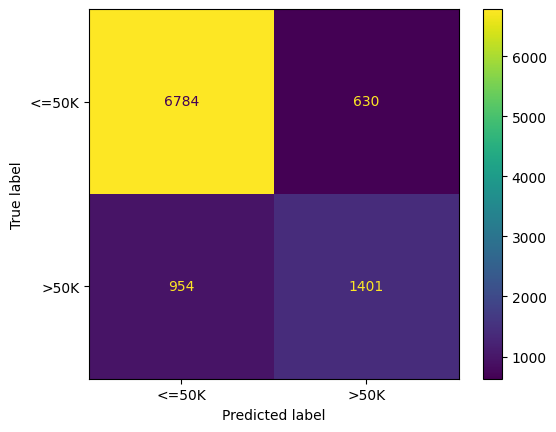

In [12]:
#Task 9.2
#Displays the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Task 10
Use GridSearchCV to find the best value of kernel, gamma, and C.

# Task 10.1
Split the dataset into 60% training, 20% validation, and 20% testing.

In [14]:
#Task 10

#Task 10.1
#Splits the data into 60% for training and 40% for testing and validation
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

#Splits the remaining 40% from the previous state the data into 50% for testing 50% validation
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

#Prints the shapes of each of the splits
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


# Task 10.2
Pass the following hyperparameters "C: 0.01, 0.1, 1, 10 and gamma: 0.01, 1, 10" for the GridSearchCV to find the best ones:

In [15]:
#Task 10.2
from sklearn.model_selection import GridSearchCV

#Sets the parameters to test
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
#Sets SVM as a new SVC
svm = SVC()
#Starts the GridSearchCV with the newly created SVM and the test parameters
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)
#Starts the SVM GridSearch training with only the first 10,000 rows 
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

#Stores the best estimator
svm_winner = svm_gs.best_estimator_
#Displays the score
svm_winner.score(X_validation, y_validation)

0.8472563472563472

# Task 10.3
Check the svm winner parameters 

In [17]:
#Task 10.3
#Prints the best parameters for the SVM
svm_winner

SVC(C=10, gamma=0.01)